In [ ]:
from darkflow.net.build import TFNet

In [6]:
options = {"model": "cfg/yolo.cfg", 
           "load": "bin/yolo.weights", 
           "threshold": 0.5, 
           "gpu": 1.0}

tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 1.7536699771881104s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep! 

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [8]:
original_img = cv2.imread('test/training/images/1.jpg')
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

In [9]:
results = tfnet.return_predict(original_img)
results

[{'label': 'person',
  'confidence': 0.74481434,
  'topleft': {'x': 149, 'y': 27},
  'bottomright': {'x': 233, 'y': 180}},
 {'label': 'bicycle',
  'confidence': 0.59103745,
  'topleft': {'x': 105, 'y': 93},
  'bottomright': {'x': 227, 'y': 249}},
 {'label': 'clock',
  'confidence': 0.58525866,
  'topleft': {'x': 92, 'y': 91},
  'bottomright': {'x': 153, 'y': 153}}]

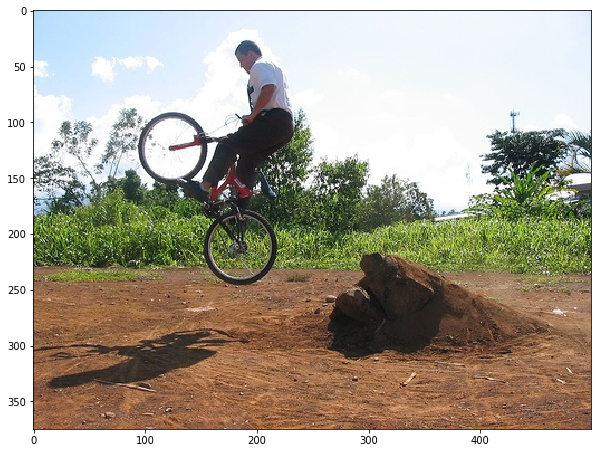

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(original_img)

In [11]:
def boxing(original_img, predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))

        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
            
    return newImage

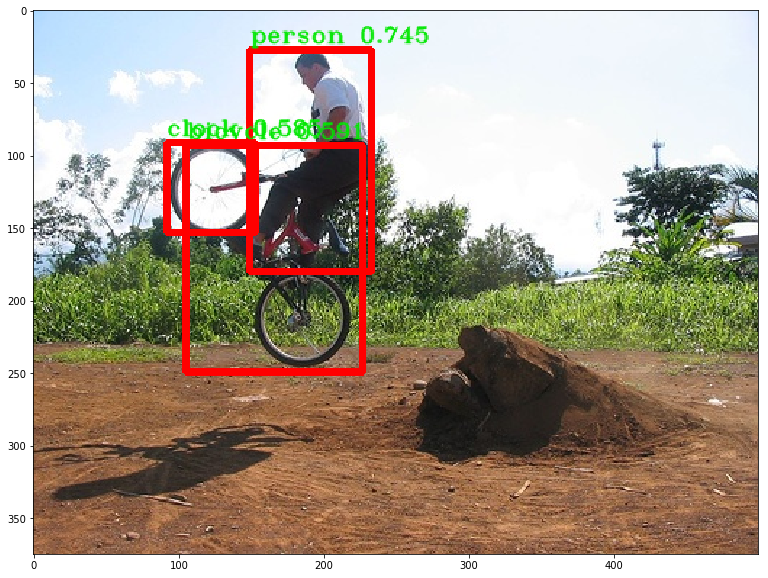

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))

In [19]:
def showYoloResult(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    res = tfnet.return_predict(img)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(boxing(img, res))
    return res

[]

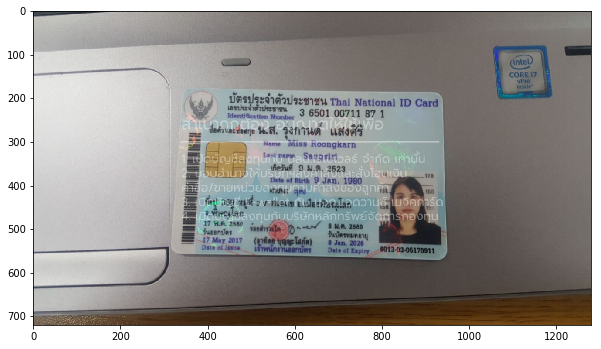

In [20]:
showYoloResult('test/_7YYsGEBT_myIDCardImage.jpg')

[]

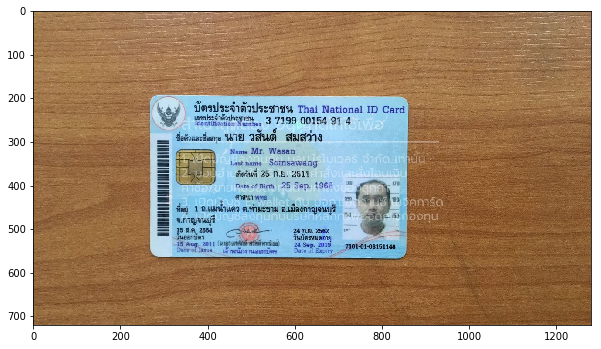

In [21]:
showYoloResult('test/__sEpS9H2_myIDCardImage.jpg')

[{'label': 'person',
  'confidence': 0.6458988,
  'topleft': {'x': 79, 'y': 103},
  'bottomright': {'x': 715, 'y': 858}},
 {'label': 'person',
  'confidence': 0.5260636,
  'topleft': {'x': 459, 'y': 692},
  'bottomright': {'x': 716, 'y': 947}}]

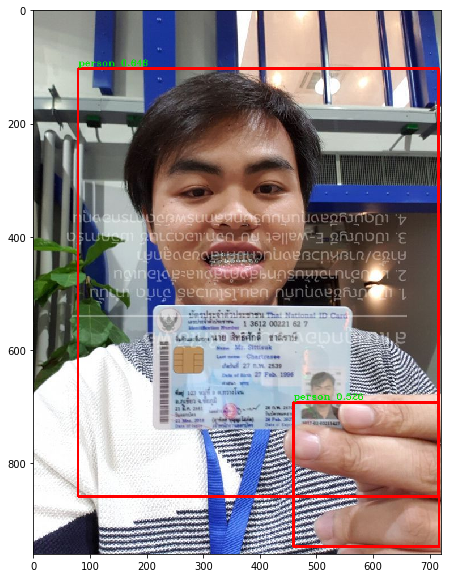

In [22]:
showYoloResult('test/B1s8we4lQ_mySelfieWithIDCardImage.jpg')

[{'label': 'person',
  'confidence': 0.78770965,
  'topleft': {'x': 65, 'y': 79},
  'bottomright': {'x': 719, 'y': 889}}]

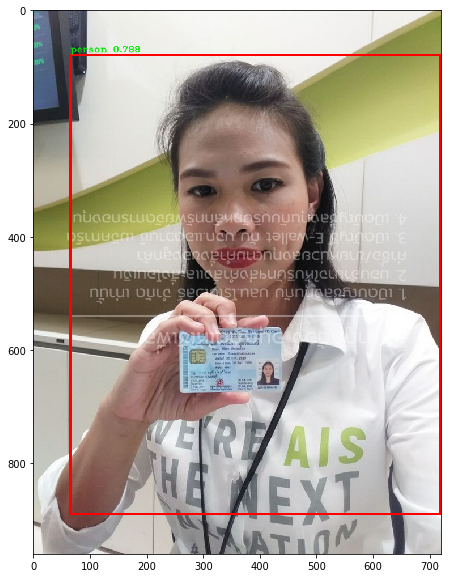

In [24]:
showYoloResult('test/Az1e83uTZ_mySelfieWithIDCardImage.jpg')

[{'label': 'mouse',
  'confidence': 0.55888516,
  'topleft': {'x': 325, 'y': 740},
  'bottomright': {'x': 622, 'y': 955}},
 {'label': 'book',
  'confidence': 0.7037752,
  'topleft': {'x': 208, 'y': 571},
  'bottomright': {'x': 492, 'y': 773}}]

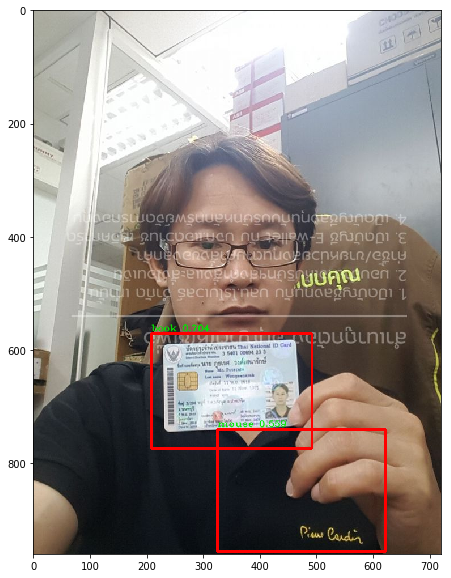

In [25]:
showYoloResult('test/cb_fBT0Q5_mySelfieWithIDCardImage.jpg')

[{'label': 'person',
  'confidence': 0.7423758,
  'topleft': {'x': 0, 'y': 73},
  'bottomright': {'x': 506, 'y': 705}}]

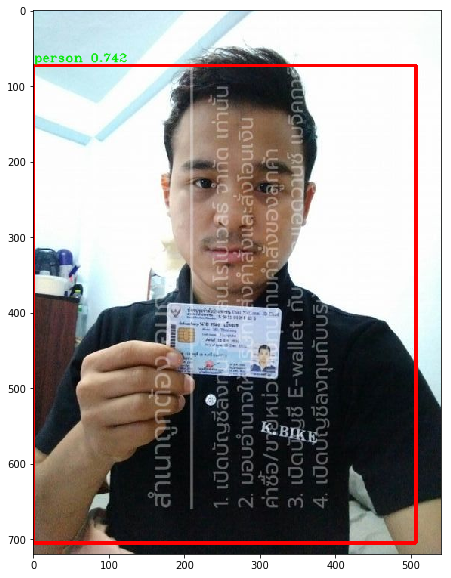

In [26]:
showYoloResult('test/8bzNeuBW1_mySelfieWithIDCardImage.jpg')

[{'label': 'person',
  'confidence': 0.6856092,
  'topleft': {'x': 59, 'y': 75},
  'bottomright': {'x': 719, 'y': 793}}]

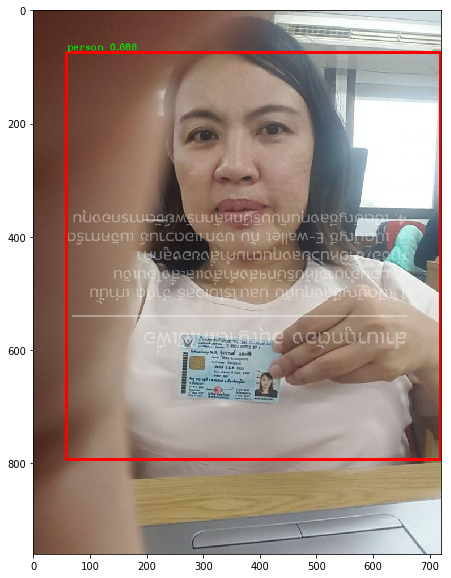

In [27]:
showYoloResult('test/6EhBlZPCW_mySelfieWithIDCardImage.jpg')